In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
import matplotlib

### Nondeterministic Forward Projections

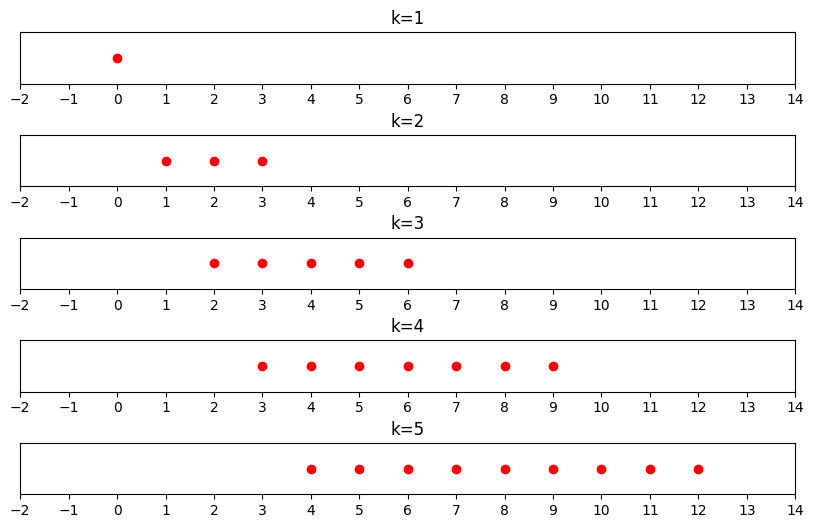

In [5]:
X = [set([0])]
u = 2
Theta = [-1, 0, 1]


for i in range(1, 5):
    X.append(set())
    for x in X[i-1]:
        for theta in Theta:
            X[i].add(x + u + theta)
X = list(map(list, X))


fig, axs = plt.subplots(5, 1)
fig.set_size_inches(10, 6)
for i in range(5):
    axs[i].scatter(X[i], np.zeros_like(X[i]), c='r')
    axs[i].set_title(f"k={i+1}")
    axs[i].set_yticks([])
    axs[i].set_xticks(np.arange(-3, 15, 1))
    axs[i].set_xlim(-2, 14)
    axs[i].set_ylim(-0.1, 0.1)
plt.subplots_adjust(hspace=1)
plt.show()


### Probabilistic Forward Projections

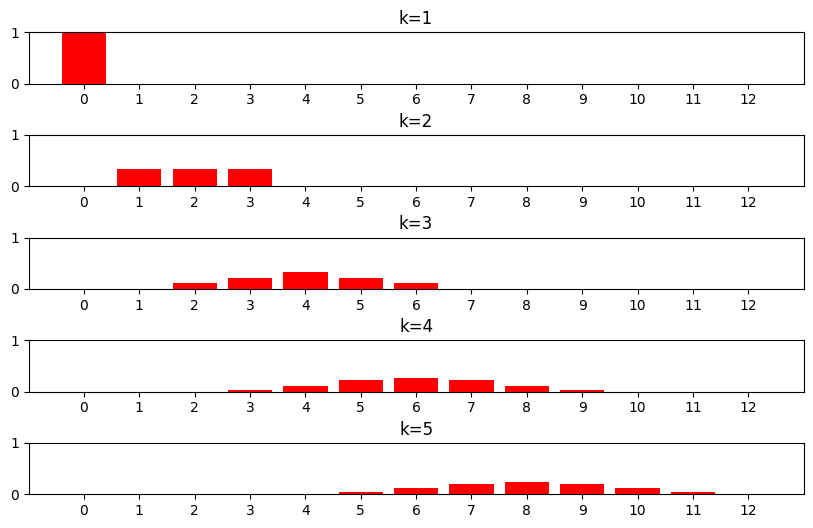

In [6]:
N = 12
u = 2
Theta = [-1, 0, 1]
P_Theta = [1/3, 1/3, 1/3]

M = np.zeros((N, N))

for i in range(N):
    for nature_action, prob in zip(Theta, P_Theta):
        if i + u + nature_action < N:
            M[i, i + u + nature_action] = prob


bel = np.zeros(N)
bel[0] = 1

bels = [bel]

for i in range(1, 5):
    bel = bel @ M
    bels.append(bel)

fig, axs = plt.subplots(5, 1)
fig.set_size_inches(10, 6)
for i in range(5):
    axs[i].bar(np.arange(N), bels[i], color='r')
    axs[i].set_title(f"k={i+1}")
    axs[i].set_xticks(np.arange(0, 13, 1))
    axs[i].set_xlim(-1, 13)
    axs[i].set_ylim(0, 1)
plt.subplots_adjust(hspace=1)
plt.show()


### Moving on Grid

In [7]:
N = 15
u = [1] * 10 + [2] * 5
Theta = [(0, 0), (0, 1), (1, 0), (0, -1), (-1, 0)]
initial_position = (2, 2)

In [8]:
def plot_grid(frame, grids, N, ax):
    ax.clear()
    ax.matshow(grids[frame], cmap='coolwarm')
    ax.set_xticks(np.arange(-.5, N, 1), minor=True)
    ax.set_yticks(np.arange(-.5, N, 1), minor=True)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=0.5)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Simulation Step: {frame + 1}')

In [9]:
def init_grid():
    grid = np.zeros((15, 15))
    for i in range(5, 10):
        for j in range(5, 10):
            grid[i, j] = -20
            grid[i+5, j+5] = 20
    return grid

#### Nondeterministic

MovieWriter imagemagick unavailable; using Pillow instead.


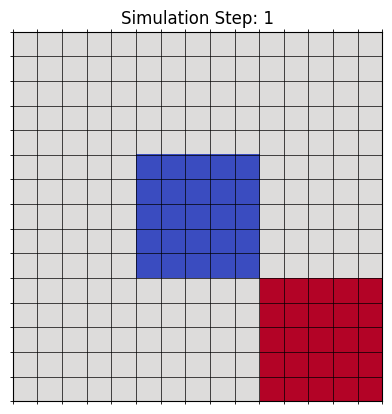

In [10]:
def simulate_nondeterministic(N, u, Theta, initial_position):
    grids = []
    grid = init_grid()
    positions = [set([initial_position])]
    grids.append(np.copy(grid))
    
    for k in range(1, 15):
        new_positions = set()
        for (x, y) in positions[-1]:
            for dx, dy in Theta:
                new_x = x + Theta[u[k-1]][0] + dx
                new_y = y + Theta[u[k-1]][1] + dy
                if 0 <= new_x < N and 0 <= new_y < N and grid[new_x, new_y] != -20:
                    new_positions.add((new_x, new_y))
                    grid[new_x, new_y] = 10
        positions.append(new_positions)
        grids.append(np.copy(grid))
    
    return grids




grids = simulate_nondeterministic(N, u, Theta, initial_position)

fig, ax = plt.subplots()
ani = FuncAnimation(fig, plot_grid, frames=len(grids), fargs=(grids, N, ax), interval=500)

ani.save('nondeterministic-2D.gif', writer='imagemagick', fps=2)

#### Probabilistic

MovieWriter imagemagick unavailable; using Pillow instead.


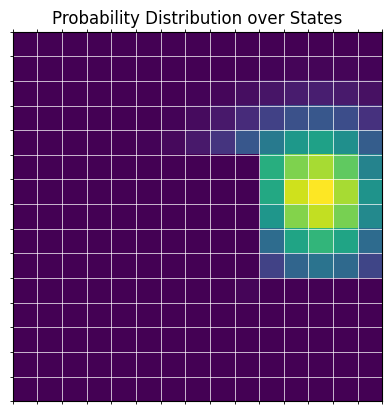

In [11]:
P_Theta = [0.2] * 5

bel = np.zeros((N, N))
bel[2, 2] = 1
bels = [bel.copy()]

grid = init_grid()

for k in range(1, 15):
    new_bel = np.zeros((N, N))
    for x in range(N):
        for y in range(N):
            for (dx, dy), prob in zip(Theta, P_Theta):
                nx = x + Theta[u[k-1]][0] + dx
                ny = y + Theta[u[k-1]][1] + dy
                if 0 <= nx < N and 0 <= ny < N and grid[nx, ny] == 0:
                    new_bel[nx, ny] += bel[x, y] * prob
    bel = new_bel
    bels.append(bel.copy())

def plot_beliefs(frame, beliefs, N, ax):
    ax.clear()
    ax.matshow(beliefs[frame], cmap='viridis')
    ax.set_xticks(np.arange(-.5, N, 1), minor=True)
    ax.set_yticks(np.arange(-.5, N, 1), minor=True)
    ax.grid(which='minor', color='white', linestyle='-', linewidth=0.5)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('Probability Distribution over States')

fig, ax = plt.subplots()
ani = FuncAnimation(fig, plot_beliefs, frames=range(len(bels)), fargs=(bels, N, ax), interval=1000)

# Since saving as a GIF may not always be available if ImageMagick is not correctly configured,
# consider saving as an MP4 or displaying the animation directly instead.
ani.save('probabilistic-2D.gif', writer='imagemagick', fps=2)
plt.show()
